In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
data = pd.read_csv('./datasets/data.csv', encoding='CP949')
target = pd.read_csv('./datasets/OECD신용등급.csv', encoding='CP949')
target.drop('신용등급', axis=1, inplace=True)

In [37]:
datasets = pd.merge(data, target, on=('국가별', '시점'), how='left')
datasets.columns = ['국가별', '시점', '인당_국민총소득', 'GDP_성장률', '디플레이터', '수출', '수입',
       '무역의존도_수출', '무역의존도_수입', '외환보유액', '부채비율', '국민부담률', '평균근로자세금', '경제활동참가율',
       '고용률', '실업률', '신용등급']
datasets['수입'] = datasets['수입'].astype(float)
datasets['무역의존도_수입'] = datasets['무역의존도_수입'].astype(float)
datasets.dropna(inplace=True)
datasets.reset_index(inplace=True)
datasets.drop(['국가별', 'index'], axis=1, inplace=True)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시점        114 non-null    int64  
 1   인당_국민총소득  114 non-null    float64
 2   GDP_성장률   114 non-null    float64
 3   디플레이터     114 non-null    float64
 4   수출        114 non-null    float64
 5   수입        114 non-null    float64
 6   무역의존도_수출  114 non-null    float64
 7   무역의존도_수입  114 non-null    float64
 8   외환보유액     114 non-null    int64  
 9   부채비율      114 non-null    float64
 10  국민부담률     114 non-null    float64
 11  평균근로자세금   114 non-null    float64
 12  경제활동참가율   114 non-null    float64
 13  고용률       114 non-null    float64
 14  실업률       114 non-null    float64
 15  신용등급      114 non-null    object 
dtypes: float64(13), int64(2), object(1)
memory usage: 14.4+ KB


In [38]:
lb = LabelEncoder()
datasets['시점'] = lb.fit_transform(datasets['시점'])
datasets.describe()

,시점,인당_국민총소득,GDP_성장률,디플레이터,수출,수입,무역의존도_수출,무역의존도_수입,외환보유액,부채비율,국민부담률,평균근로자세금,경제활동참가율,고용률,실업률
count,114.000000,114.000000,114.000000,114.000000,1.140000e+02,1.140000e+02,114.000000,114.000000,1.140000e+02,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,1.710526,32750.570175,3.348246,95.848246,2.238427e+05,2.247745e+05,36.308246,36.257544,8.296503e+04,72.816588,34.342982,38.482456,60.285965,66.111404,8.215789
std,1.053638,19334.244737,3.164914,13.415816,2.823353e+05,3.293057e+05,19.655216,19.602815,1.836847e+05,41.206568,7.007278,8.778587,5.906092,7.026458,4.194235
min,0.000000,3911.000000,-5.500000,58.200000,3.092000e+03,3.919000e+03,8.240000,2.240000,2.790000e+02,6.788000,11.400000,14.700000,48.100000,46.300000,2.600000
25%,1.000000,16402.250000,1.825000,88.625000,4.964800e+04,4.503625e+04,20.455000,22.787500,9.670250e+03,45.590500,30.500000,32.675000,57.325000,61.025000,5.100000
50%,2.000000,31591.500000,2.950000,100.000000,1.204630e+05,8.910150e+04,31.785000,29.410000,3.217000e+04,62.237500,33.100000,38.800000,59.750000,66.200000,7.350000
75%,3.000000,43878.500000,4.200000,103.900000,3.253045e+05,3.147872e+05,51.052500,50.712500,7.330925e+04,97.977500,39.350000,43.925000,63.175000,71.725000,9.825000
max,3.000000,88706.000000,25.200000,143.100000,1.503400e+06,2.248800e+06,86.700000,84.740000,1.233153e+06,234.073000,48.000000,57.100000,81.400000,83.800000,24.900000


In [39]:
x_train, x_test, y_train, y_test = train_test_split(datasets.iloc[:,:14], datasets.iloc[:,14], test_size=0.2, random_state=42)

In [44]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(pred, y_test)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2}')

mse : 8.017392647118834 
rmse : 2.8315000701251685 
r2 : -0.06994990320739825


<AxesSubplot:>

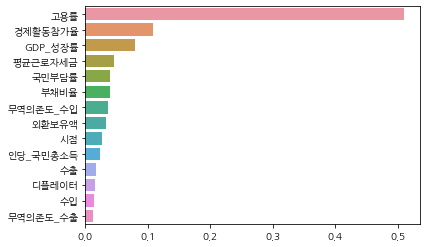

In [45]:
fi = pd.Series(rf.feature_importances_, rf.feature_names_in_)
fi = fi.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=fi.values, y=fi.index)

In [46]:
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_train_ss = pd.DataFrame(x_train_ss, columns=x_train.columns)
x_test_ss = ss.fit_transform(x_test)
x_test_ss = pd.DataFrame(x_test_ss, columns=x_test.columns)

rf1 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf1.fit(x_train_ss, y_train)
pred = rf1.predict(x_test_ss)
mse = mean_squared_error(pred, y_test)
rmse = np.sqrt(mse)
r2 = r2_score(pred, y_test)
print(f'mse : {mse} \nrmse : {rmse} \nr2 : {r2}')

mse : 4.541491460922088 
rmse : 2.1310775351737177 
r2 : 0.5956209502383261


<AxesSubplot:>

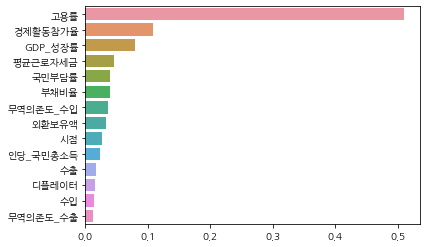

In [47]:
fi1 = pd.Series(rf1.feature_importances_, x_train_ss.columns)
fi1 = fi1.sort_values(ascending=False)
plt.rcParams['font.family'] = 'NanumGothic'
sns.barplot(x=fi.values, y=fi.index)